In [47]:
import csv

DIR = '../../Data/'
f = open(DIR+'subwayfee.csv', encoding='utf-8-sig')
data = csv.reader(f)
header = next(data)
print(header)
i = 0
for row in data: 
    print(row)
    if i >5:
        break
    i += 1
f.close()

['사용월', '호선명', '역ID', '지하철역', '유임승차', '유임하차', '무임승차', '무임하차']
['Jun-22', '1호선', '150', '서울역', '1150754', '1123193', '194717', '187155']
['Jun-22', '1호선', '151', '시청', '537067', '543569', '80671', '78279']
['Jun-22', '1호선', '152', '종각', '834173', '815704', '131987', '121717']
['Jun-22', '1호선', '153', '종로3가', '450317', '404106', '299617', '278151']
['Jun-22', '1호선', '154', '종로5가', '394420', '404105', '254236', '244555']
['Jun-22', '1호선', '155', '동대문', '212719', '198987', '117499', '118515']
['Jun-22', '1호선', '156', '신설동', '264825', '252339', '112362', '106855']


In [48]:
f = open(DIR+'subwayfee.csv', encoding='utf-8-sig')
data = csv.reader(f)
next(data)
max_rate = 0
rate = 0
for row in data:
    for i in range(4, 8):
        row[i] = int(row[i]) # 4, 5, 6, 7 컬럼값을 정수로 변환
    if row[6] != 0:
        rate = (row[6]*100) / (row[4]+row[6]) # 무임승차수 /(유임승차수+무임승차수)
        if rate > max_rate:
            max_rate = rate
            print(row, round(rate, 2), '%')

['Jun-22', '1호선', '150', '서울역', 1150754, 1123193, 194717, 187155] 14.47 %
['Jun-22', '1호선', '153', '종로3가', 450317, 404106, 299617, 278151] 39.95 %
['Jun-22', '1호선', '157', '제기동', 218782, 209109, 263173, 281985] 54.61 %
['Jun-22', '경원선', '1916', '소요산', 32659, 25998, 62990, 56806] 65.86 %
['Jun-22', '7호선', '2756', '신중동', 0, 0, 1, 0] 100.0 %


In [49]:
f = open(DIR+'subwayfee.csv', encoding='utf-8-sig')
data = csv.reader(f)
next(data)
max_rate = 0
rate = 0

for row in data:
    for i in range(4,8):
        row[i] = int(row[i])
    if row[6] != 0:
        rate = (row[6]*100)/(row[4]+row[6])
        if rate > max_rate:
            max_rate = rate
            print(row, round(rate, 2), '%')

['Jun-22', '1호선', '150', '서울역', 1150754, 1123193, 194717, 187155] 14.47 %
['Jun-22', '1호선', '153', '종로3가', 450317, 404106, 299617, 278151] 39.95 %
['Jun-22', '1호선', '157', '제기동', 218782, 209109, 263173, 281985] 54.61 %
['Jun-22', '경원선', '1916', '소요산', 32659, 25998, 62990, 56806] 65.86 %
['Jun-22', '7호선', '2756', '신중동', 0, 0, 1, 0] 100.0 %


In [50]:
f = open(DIR+'subwayfee.csv', encoding='utf-8-sig')
data = csv.reader(f)
next(data)
max_rate = 0
rate = 0
max_row = []
total_count = 0
max_total_num = 0
# [4] / [4] + [6]

for row in data:
    for i in range(4,8):
        row[i] = int(row[i])
    total_count = row[4] + row[6]
    if row[6] != 0 and total_count > 100000:
        rate = row[4] / total_count
        if rate > max_rate:
            max_rate = rate
            max_row = row
            max_total_num = total_count
print(max_row)
print("역이름: {0}, 전체 인원: {1:,}, 유임승차인원: {2:,}, 유임승차 비율: {3:,}".
format(max_row[3], max_total_num, max_row[4], round(max_rate, 2)))
f.close()    

['Jun-22', '2호선', '209', '한양대', 269240, 295829, 12481, 13227]
역이름: 한양대, 전체 인원: 281,721, 유임승차인원: 269,240, 유임승차 비율: 0.96


In [51]:
f = open(DIR+'subwayfee.csv', encoding='utf-8-sig')
data = csv.reader(f)
next(data)
total_count = 0
min_rate = 100
min_row = []
min_total_count = 0
for row in data:
    for i in range(4,8):
        row[i] = int(row[i])
    total_count = row[4]+row[6]
    if (row[4]!=0) and (total_count >= 10000):
        if row[4] / total_count <= 0.5:
            print(row, round(row[4]/total_count,2))
            if row[4]/total_count < min_rate:
                min_rate = row[4]/total_count
                min_row = row
                min_total_count = total_count
print('유임 승차 비율이 가장 낮은 역: {0}, 전체 인원:{1:,}, 유임승차인원:{2:,}, 유임승차비율:{3:,}'.
format(min_row[3], min_total_count, min_row[4], round(min_rate, 2)))
f.close()

['Jun-22', '1호선', '157', '제기동', 218782, 209109, 263173, 281985] 0.45
['Jun-22', '1호선', '159', '동묘앞', 122460, 131299, 146455, 147539] 0.46
['Jun-22', '경원선', '1916', '소요산', 32659, 25998, 62990, 56806] 0.34
['Jun-22', '중앙선', '1218', '원덕', 5854, 5749, 6959, 6739] 0.46
['Jun-22', '중앙선', '1219', '용문', 34168, 34477, 38467, 38202] 0.47
유임 승차 비율이 가장 낮은 역: 소요산, 전체 인원:95,649, 유임승차인원:32,659, 유임승차비율:0.34


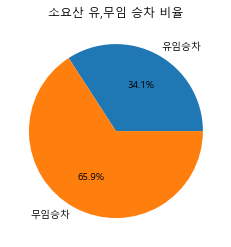

In [52]:
import platform
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

if(platform.system() == 'Windows'):
    plt.rc('font', family='Malgun Gothic')
else:
    plt.rc('font', family='AppleGothic')

plt.title(min_row[3] + " 유,무임 승차 비율")
label = ['유임승차', '무임승차']
values = [min_row[4], min_row[6]]
plt.pie(values, labels=label, autopct='%.1f%%')
plt.show()

In [57]:
max = [0] * 4 # [0]: 최대 유임승차,[1]: 최대 유임하차, [2]: 최대 무임승차, [3]: 최대 무임하차
max_station = [''] * 4
label = ['유임승차', '유임하차', '무임승차', '무임하차']
# with 구문: 자동으로 파일을 close()시킴
with open(DIR+'subwayfee.csv', encoding='utf-8-sig') as f:
    data = csv.reader(f)
    next(data)
    for row in data:
        for i in range(4, 8):
            row[i] = int(row[i])
            if row[i] > max[i-4]: # 원본데이터의 컬럼 (인덱스 -4) -> max리스트의 인덱스
                max[i-4] = row[i]
                max_station[i-4] = row[3] + ' ' + row[1] # '역이름 지하철노선' 추가

for i in range(4):
    print('{0}: {1} {2:,}'.format(label[i], max_station[i], max[i]))

label = ['유임승차', '유임하차', '무임승차', '무임하차']
c = ['#14CCC0', '#389993', '#FF1C6A', '#CC14AF'] # 파이차트 컬러 값
pic_count = 0
with open(DIR+'subwayfee.csv', encoding='utf-8-sig') as f:
    data = csv.reader(f)
    next(data)
    if(platform.system() == 'Windows'):
        plt.rc('font', family='Malgun Gothic')
    else:
        plt.rc('font', family='AppleGothic')
    for row in data:
        for i in range(4, 8):
            row[i] = int(row[i])
        
        plt.figure(dpi=200) # 저장할 그림파일의 dpi 설정
        plt.title(row[3] + ' ' + row[1])
        plt.pie(row[4:8], labels=label, colors=c, autopct = '%.1f%%')
        plt.savefig(row[3] + ' ' + row[1] + '.png')
        plt.close() # 파일 닫기
        
        pic_count += 1
        if pic_count >= 10:
            break


유임승차: 강남 2호선 2,055,521
유임하차: 강남 2호선 2,039,847
무임승차: 종로3가 1호선 299,617
무임하차: 제기동 1호선 281,985
